__Regression of Air France Revenue:__

In [135]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
from collections import OrderedDict
from matplotlib import cm
# Hierarchical CLustering of OECD Composite Indicator
# Import normalize
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pdb
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2

In [15]:
df = pd.read_csv('regressmass.csv', parse_dates=['dates'], index_col='dates')
df = df[df.applymap(np.isreal).any(1)]
df = df.interpolate().ffill().bfill().dropna()
df = df.select_dtypes(include=['float64', 'int64'])
df= df.replace([np.inf, -np.inf], np.nan)
df = df_model = df
df.head()

,SALES_REV_TURN,FUEL_EXPENSES,IS_OPERATING_EXPN,IS_SELLING_EXPENSES,CF_DEPR_AMORT,ACCT_RCV_TURN,BS_ACCT_PAYABLE,EBIT,IS_INT_EXPENSE,BS_TOTAL_CAPITAL_LEASES,...,Maintenance,EBITDAR.2,Transavia.2,EBITDAR.3,Other,EBITDAR.4,Cargo,EBITDAR.5,Adjustments.1,Revenue.7
dates,,,,,,,,,,,,,,,,,,,,,
2002-06-30,3315,353,3167,288.0,243,8.0422,1377,148,50,5452.0,...,0.0,85.0,0.0,-34.0,0.0,4.0,0.0,-43.0,0.0,2.0
2002-09-30,3236,353,3167,288.0,243,8.0422,1377,148,50,5452.0,...,0.0,85.0,0.0,-34.0,0.0,4.0,0.0,-43.0,0.0,2.0
2002-12-31,3136,683,6237,288.0,506,8.0422,1322,135,87,5452.0,...,0.0,85.0,0.0,-34.0,0.0,4.0,0.0,-43.0,0.0,2.0
2003-03-31,3000,683,6237,288.0,506,8.0422,1375,135,87,5452.0,...,0.0,85.0,0.0,-34.0,0.0,4.0,0.0,-43.0,0.0,2.0
2003-06-30,3009,331,3022,288.0,304,8.0422,1273,-13,35,5452.0,...,0.0,85.0,0.0,-34.0,0.0,4.0,0.0,-43.0,0.0,2.0


                     labels
countries                  
SALES_REV_TURN           15
FUEL_EXPENSES            15
IS_OPERATING_EXPN        15
IS_SELLING_EXPENSES      15
CF_DEPR_AMORT            15


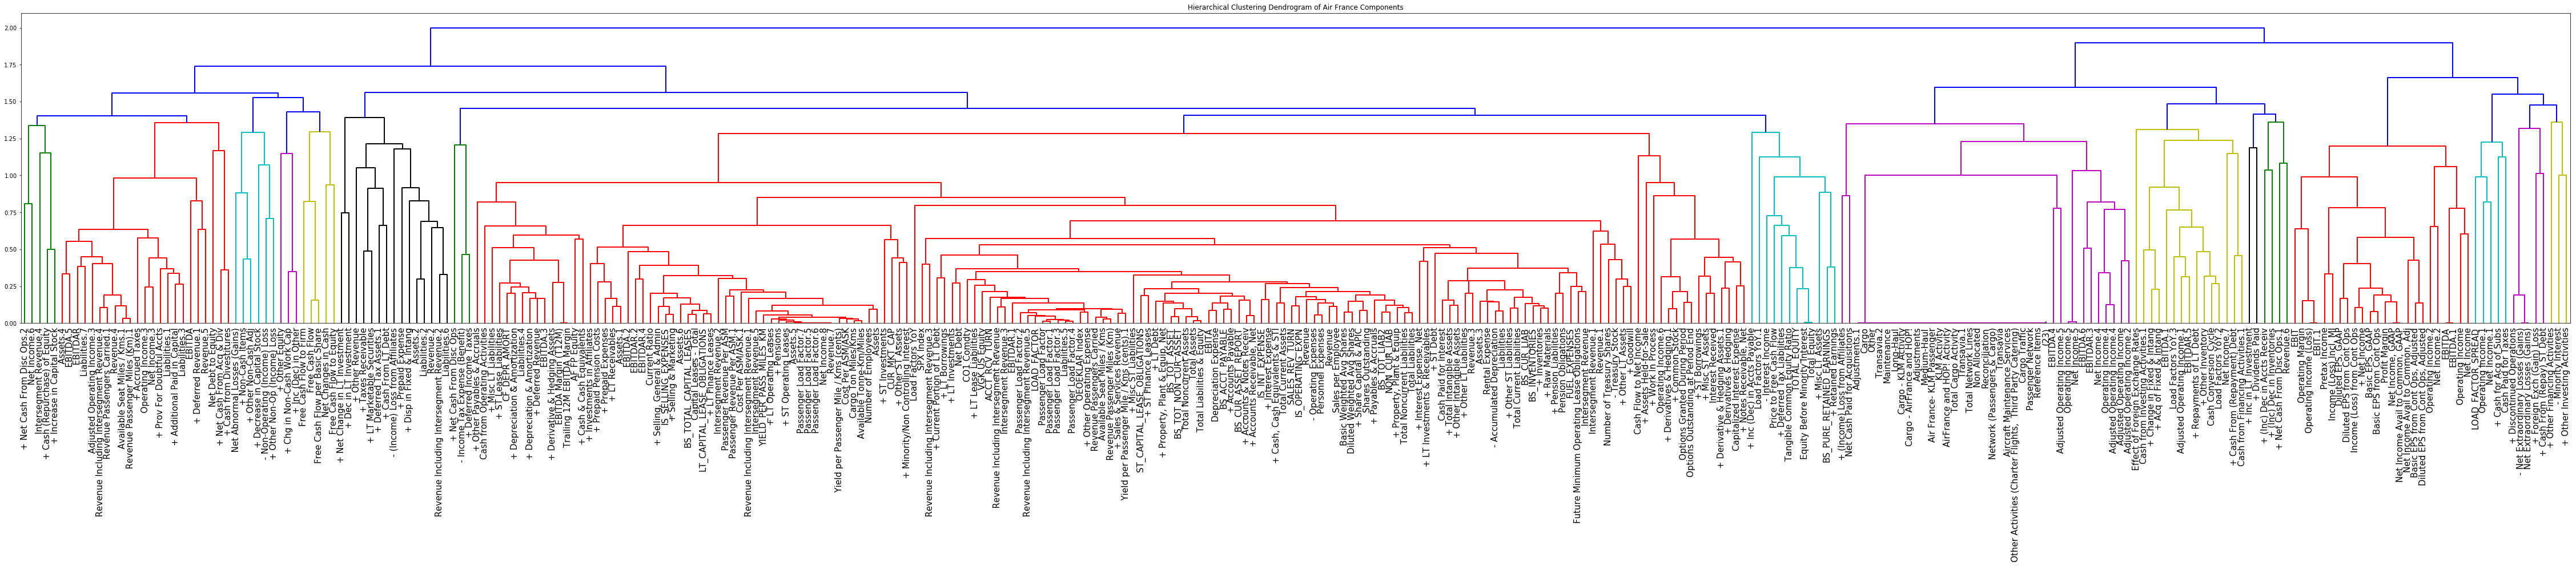

In [16]:
df_quadratic = df.resample('D').interpolate(method='quadratic')
dendrogram_data = df_quadratic.fillna(0).T

# Normalize the movements: normalized_movements
normalized_movements = normalize(dendrogram_data)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

labels = fcluster(mergings, 1.2, criterion='distance')
labels = pd.DataFrame({'labels':labels, 'countries':dendrogram_data.index}).set_index('countries')
print(labels.head())

# Plot the dendrogram
labelList = [i for i in dendrogram_data.index]

plt.figure(figsize=(80, 10))
plt.title('Hierarchical Clustering Dendrogram of Air France Components')
dendrogram(mergings,
           truncate_mode='level',
           leaf_rotation=90.,
           leaf_font_size=15.,
           labels=labelList,
           show_contracted=True)
plt.show();

In [45]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2

In [49]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
dataset
# values = dataset.values
# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # specify the number of lag hours
# n_hours = 3
# n_features = 8
# # frame as supervised learning
# reframed = series_to_supervised(scaled, n_hours, 1)
# print(reframed.shape)
 
# # split into train and test sets
# values = reframed.values
# n_train_hours = 365 * 24
# train = values[:n_train_hours, :]
# test = values[n_train_hours:, :]
# # split into input and outputs
# n_obs = n_hours * n_features
# train_X, train_y = train[:, :n_obs], train[:, -n_features]
# test_X, test_y = test[:, :n_obs], test[:, -n_features]
# print(train_X.shape, len(train_X), train_y.shape)
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
# test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()
 
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21528,2012,6,15,23,NaN,11,21,1006.0,NW,25.93,0,0
21529,2012,6,16,0,16.0,12,19,1006.0,NW,29.06,0,0
21530,2012,6,16,1,11.0,12,18,1006.0,NW,30.85,0,0
